In [1]:
!pip install --upgrade nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 19.1 MB/s eta 0:00:0000:010:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.9.1 which is incompatible.


In [2]:
import nltk
nltk.download('wordnet', download_dir='/usr/share/nltk_data/')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data/...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [5]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [6]:
!pip install transformers sentence-transformers gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 33.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 94.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.8 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd 
import os
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import html
import unicodedata
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import torch
from transformers import pipeline

In [2]:
print(torch.cuda.is_available())

True


In [3]:
TRAIN_PATH = '/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/train.csv'
TEST_PATH = '/kaggle/input/jigsaw-unintended-bias-in-toxicity-classification/test.csv'

In [4]:
train_df = pd.read_csv(TRAIN_PATH)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [6]:
train_df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [7]:
train_df['comment_text'].isna().sum()

3

In [8]:
train_df.dropna(subset = 'comment_text',inplace=True)

In [9]:
text_train = train_df['comment_text'].astype('string')

In [10]:
text_train

0          This is so cool. It's like, 'would you want yo...
1          Thank you!! This would make my life a lot less...
2          This is such an urgent design problem; kudos t...
3          Is this something I'll be able to install on m...
4                       haha you guys are a bunch of losers.
                                 ...                        
1804869    Maybe the tax on "things" would be collected w...
1804870    What do you call people who STILL think the di...
1804871    thank you ,,,right or wrong,,, i am following ...
1804872    Anyone who is quoted as having the following e...
1804873    Students defined as EBD are legally just as di...
Name: comment_text, Length: 1804871, dtype: string

In [11]:
(train_df['target'] >= 0.5).astype(int).value_counts(normalize=True) 

target
0    0.920031
1    0.079969
Name: proportion, dtype: float64

In [12]:
label_train =(train_df['target'] >= 0.5).astype(int)

In [13]:
label_train

0          0
1          0
2          0
3          0
4          1
          ..
1804869    0
1804870    0
1804871    0
1804872    1
1804873    0
Name: target, Length: 1804871, dtype: int64

In [14]:
label_train.shape,text_train.shape

((1804871,), (1804871,))

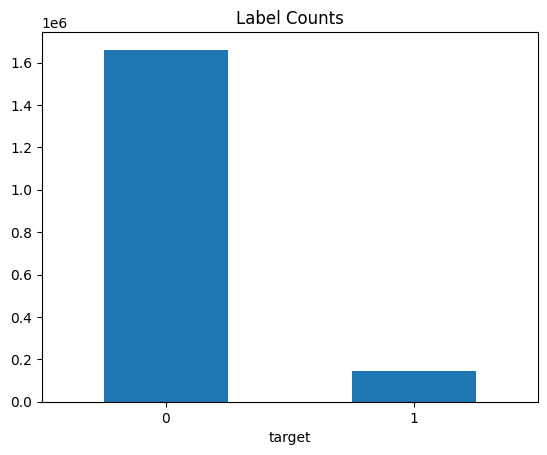

In [15]:
label_train.value_counts().plot(kind='bar',rot=0,title='Label Counts')
plt.show()

# Preprocessing Pipeline

In [20]:
stop_words = stopwords.words('english')
def Tokenization(text):
  return word_tokenize(text)

def StopWords(tokens, stop_words):
  return [word for word in tokens if word not in stop_words]

def stemming(tokens):
  porter = PorterStemmer()
  return [porter.stem(word) for word in tokens]

def WordLemmatization(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word,pos='n') for word in tokens]

def VerbLemmatization(tokens):
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word,pos='v') for word in tokens]

def LowerCase(tokens):
  return [word.lower() for word in tokens]

def RemovePunctuation(tokens):
  return [re.sub(r'[^\w\']', '', word) for word in tokens]

def RemoveWhitespaces(text):
    return text.strip()

def ReplaceNumbers(text):
    return re.sub(r'\d+', '', text)


def RemoveNonASCII(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def TextNormalization(text):
    text = RemoveNonASCII(text)
    text = ReplaceNumbers(text)

    tokens = Tokenization(text)
    tokens = RemovePunctuation(tokens)
    tokens = LowerCase(tokens)
    cleaned_tokens = [word for word in tokens if word != '']
    
    tokens = StopWords(cleaned_tokens, stop_words)
    lemmas = WordLemmatization(tokens)
    words = VerbLemmatization(lemmas)

    return words

def CorpusNormalization(corpus):
  return [TextNormalization(text) for text in corpus]

In [21]:
text_train.iloc[0]

"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"

In [22]:
normalized_text = TextNormalization(text_train.iloc[0])

In [23]:
normalized_text

['cool',
 "'s",
 'like',
 "'would",
 'want',
 'mother',
 'read',
 "'",
 'really',
 'great',
 'idea',
 'well',
 'do']

In [24]:
text_train = text_train.apply(lambda x: TextNormalization(x) if pd.notna(x) else '')

In [25]:
text_train

0          [cool, 's, like, 'would, want, mother, read, '...
1          [thank, would, make, life, lot, less, anxietyi...
2          [urgent, design, problem, kudos, take, impress...
3             [something, 'll, able, install, site, release]
4                                  [haha, guy, bunch, loser]
                                 ...                        
1804869    [maybe, tax, thing, '', would, collect, produc...
1804870    [call, people, still, think, divine, role, cre...
1804871                [thank, right, wrong, follow, advice]
1804872    [anyone, quote, follow, exchange, even, apocry...
1804873    [student, define, ebd, legally, disable, eligi...
Name: comment_text, Length: 1804871, dtype: object

In [26]:
test_df = pd.read_csv(TEST_PATH)

In [27]:
test_df.head()

,id,comment_text
0,7097320,[ Integrity means that you pay your debts.]\n\...
1,7097321,This is malfeasance by the Administrator and t...
2,7097322,@Rmiller101 - Spoken like a true elitist. But ...
3,7097323,"Paul: Thank you for your kind words. I do, in..."
4,7097324,Sorry you missed high school. Eisenhower sent ...


In [28]:
text_text = test_df['comment_text'].apply(lambda x: TextNormalization(x) if pd.notna(x) else '')

In [29]:
text_text

0        [integrity, mean, pay, debt, apply, president,...
1        [malfeasance, administrator, board, waste, money]
2        [rmiller, speak, like, true, elitist, look, bu...
3        [paul, thank, kind, word, indeed, strong, beli...
4        [sorry, miss, high, school, eisenhower, send, ...
                               ...                        
97315    [lose, job, promote, misinformation, harmful, ...
97316    [thin, project, mean, lower, fire, danger, imp...
97317     [hope, millennials, happy, put, airhead, charge]
97318    ['m, think, kellyanne, conway, aka, trump, whi...
97319    [still, ca, n't, figure, pizza, ak, cost, pizz...
Name: comment_text, Length: 97320, dtype: object

# tf-idf vectorization

In [30]:
norm_train_strings = [" ".join(words) for words in text_train]
norm_test_strings = [" ".join(words) for words in text_text]

In [31]:
norm_train_strings[:10]

["cool 's like 'would want mother read ' really great idea well do",
 "thank would make life lot less anxietyinducing keep n't let anyone get way",
 'urgent design problem kudos take impressive',
 "something 'll able install site release",
 'haha guy bunch loser',
 'ur sh tty comment',
 'hahahahahahahahhha suck',
 'ffffuuuuuuuuuuuuuuu',
 'rancher seem motivate mostly greed one right allow animal destroy public land',
 "great show combo 'd expect good together"]

In [32]:
vectorizer = TfidfVectorizer()
vectorizer.fit(norm_train_strings)
X= vectorizer.transform(norm_train_strings)
X_test = vectorizer.transform(norm_test_strings)

In [33]:
X.shape,label_train.shape, X_test.shape

((1804871, 415737), (1804871,), (97320, 415737))

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, label_train, test_size=0.4, random_state=42)

In [35]:
X_train.shape,y_train.shape, X_val.shape, y_val.shape

((1082922, 415737), (1082922,), (721949, 415737), (721949,))

# Model

In [36]:
Lr = LogisticRegression(random_state=42,solver='sag',max_iter=500,n_jobs = -1)

In [37]:
Lr.fit(X_train,y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=42, solver='sag')

In [38]:
cossval_accuracy = cross_val_score(Lr, X, label_train, cv=5, scoring='roc_auc')
print(cossval_accuracy)
print(cossval_accuracy.mean())

[0.94588804 0.94483225 0.94610684 0.9439153  0.9431837 ]
0.9447852233796168


In [39]:
y_pred = Lr.predict(X_val)

# Evaluation

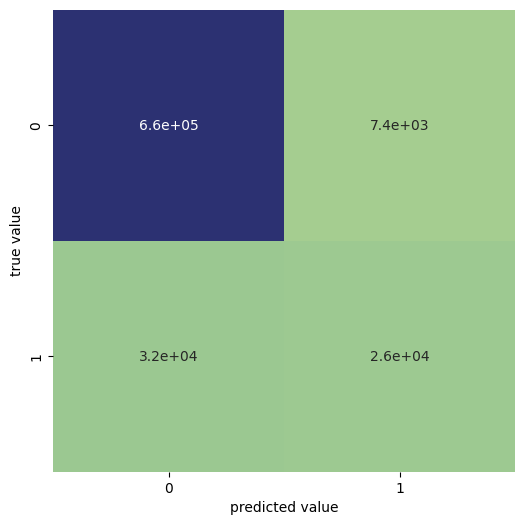

In [40]:
plt.figure(figsize=(8, 6))
mat = confusion_matrix(y_val, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='crest')
plt.xlabel('predicted value')
plt.ylabel('true value');

In [41]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    664225
           1       0.78      0.45      0.57     57724

    accuracy                           0.95    721949
   macro avg       0.87      0.72      0.77    721949
weighted avg       0.94      0.95      0.94    721949



# Using DistiliBERT

In [16]:
DEVICE = "cuda:0"
MODEL_PATH = "distilbert-base-uncased-finetuned-sst-2-english"
distilbert_pipeline = pipeline(
    model = MODEL_PATH,
    tokenizer = MODEL_PATH,
    device = DEVICE,
    top_k = None
    
)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


In [17]:
distilbert_pipeline.model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [18]:
text_train[0]

"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"

In [19]:
distilbert_pipeline(text_train[0])

[[{'label': 'POSITIVE', 'score': 0.9997625946998596},
  {'label': 'NEGATIVE', 'score': 0.00023738663003314286}]]

In [20]:
label_train[0]

0

In [21]:
text_train[4]

'haha you guys are a bunch of losers.'

In [22]:
distilbert_pipeline(text_train[4])

[[{'label': 'NEGATIVE', 'score': 0.9995898604393005},
  {'label': 'POSITIVE', 'score': 0.0004101285303477198}]]

In [23]:
label_train.loc[4]

1

In [24]:
LABEL_ORDER = ['NEGATIVE', 'POSITIVE']
def get_toxicity_score(output):
    scores = {x['label']: x['score'] for x in output}
    return [scores[label] for label in LABEL_ORDER]

In [38]:
X_train, X_val, y_train, y_val = train_test_split(text_train, label_train, test_size=0.4, random_state=42)

In [39]:
X_val.shape,y_val.shape

((721949,), (721949,))

In [40]:
y_val.value_counts()

target
0    664225
1     57724
Name: count, dtype: int64

In [41]:
y_val = y_val.apply(lambda x: 0 if x == 1 else 1)

In [42]:
y_predict  = []
for x in distilbert_pipeline(list(X_val),truncation=True, max_length=512, padding=True):
  neg_score,pos_score = get_toxicity_score(x)
  y_predict.append(0 if neg_score > pos_score else 1)

In [43]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.09      0.87      0.17     57724
           1       0.96      0.26      0.41    664225

    accuracy                           0.31    721949
   macro avg       0.53      0.57      0.29    721949
weighted avg       0.89      0.31      0.40    721949

